In [2]:
import pandas as pd                                             
import numpy as np     
import seaborn as sns                                         
from matplotlib import pyplot as plt                            
from sklearn.model_selection import train_test_split                         
from sklearn.tree import DecisionTreeRegressor                  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression               
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor


# Split The Data



In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/CovidDietData.csv')
data.pop(data.columns[0]) #drop the index column
x = data.drop(columns = 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')
y = data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0 )


# Linear Regression



r2 score =  0.874293212629689


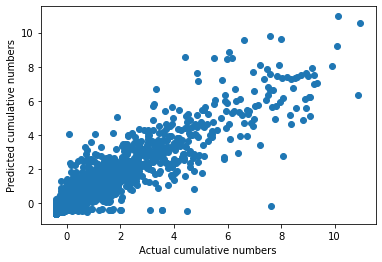

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_test = lr.predict(x_test)
plt.scatter(y_test, y_pred_test)
print("r2 score = ", r2_score(y_test, y_pred_test)) # Coefficient of determination : measures the prediction quality of a linear regression) | close to 1 means its a good model, close to 0 means its a bad model
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()


# Decision Tree




r2 score =  0.874293212629689


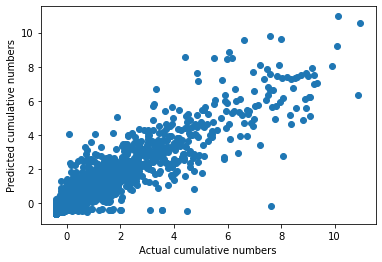

In [11]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=0)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
print("r2 score = ",r2_score(y_test, y_pred_test))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()


# Random Forests



r2 score =  0.9139298165990435


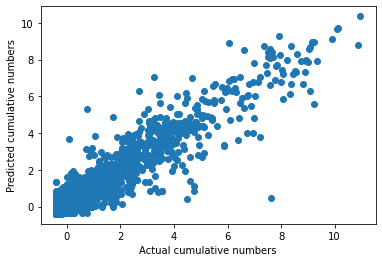

In [12]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("r2 score = ",r2_score(y_test, y_predict))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

Comparing the actual/predicted target according to the variation of one feature

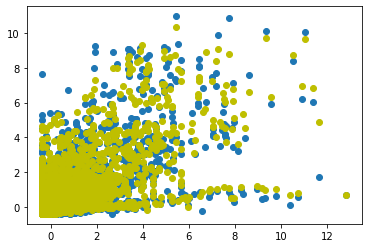

In [13]:
plt.scatter(x_test.iloc[:,1],y_test)
plt.scatter(x_test.iloc[:,1],y_predict, c="y")

# Artificial Neural Networks



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9220537352070766


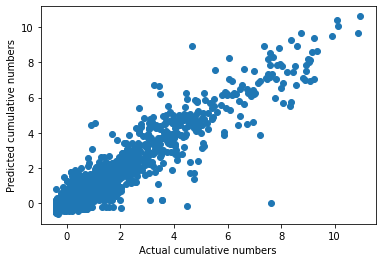

In [4]:
nn = MLPRegressor(hidden_layer_sizes=(100,200,100,), activation='tanh',max_iter=500, solver='lbfgs');
nn.fit(x_train, y_train)
predictions =  nn.predict(x_test)
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

Comparing the actual/predicted target according to the variation of one feature

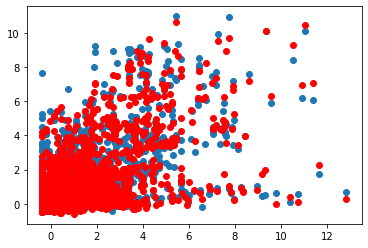

In [5]:
plt.scatter(x_test.iloc[:,1],y_test)
plt.scatter(x_test.iloc[:,1],predictions, c="r")
plt.show()

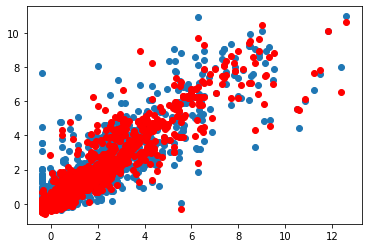

In [9]:
plt.scatter(x_test.iloc[:,0],y_test)
plt.scatter(x_test.iloc[:,0],predictions, c="r")